<br />
<p align="center">
  <img src="images/dtlogo.png" alt="Logo" width="111" height="100">

  <h1 align="center">PID controller Exercise</h1>
</p>


### Requirements:

You need to .....

1. simualtion track
2. hardware track
    - DB21M up and running
    - 2 AprilTags

### Intended outcomes:

Calibrate the Duckiebot kinematic model using the data from the wheel encoders.

### Steps:

1. Theory  
2. Approach
3. Implementation
4. Validation



1. Theory -> Review odometry class
2. Approach -> 
    - Use wheel encoders to estimate the pose of the DB using deadrecknonig approximation. 
    - Use estimate and ground truth to best fit

3. Implementation ->
    - Read the data from the wheel encoders 
        - Sim:
        - HW :
            
    - Obtain the gorund truth from AprilTags


4. Validation

1. Theoretical understanding of the Duckiebot kinematic model, in particular what the parameters _R_ and _L_ represent.
2. Approach:
    - Wheel encoders and deadrecknonig
    
    - Straight path 
    - Curved path (e.g., sinusoidal)

3. Validation of the resulting parameters.



## Let's start

In this activity...

**DO NOT CHANGE THE NAME OF THE FUNCTION**

In [3]:
import numpy as np
# Heading control
def PIDController(
    v_0, 
    x_hat, 
    prev_e_x, 
    prev_int_x, 
    delta_t):
    """
    Args:
        delta_phi_right (:double:) delta phi right.
        delta_phi_left (:double:) delta phi left.
        prev_e (:double:) previous error.
        delta_t (:double:) delta time.
    returns:
        u (:double:) control command for omega.
        current_e (:double:) current error.
    """
    ## Set outside this function:
    # gain = 0.45
    # x0, y0, theta0 = [0, 0, 0]
    
    
    v_0=0.2

    # Error along x

    x_ref = 0.15

    # error
    e_x = x_ref - x_hat

    # integral of the error
    e_int_x = prev_int_x + e_x*delta_t

    # antiwindup
    e_int_x = max(min(e_int_x,3),-3)

    # derivative of the error
    e_der_x = (e_x - prev_e_x)/delta_t

    # PID parameters

    Kp_x=1.0
    Ki_x=0.00001
    Kd_x=4
    
    # PID controller for omega
    omega = Kp_x*e_x + Ki_x*e_int_x + Kd_x*e_der_x
    
    u = [v_0, omega]
    
    # print(f"\n\nDelta time : {delta_t} \nE : {e_theta} \nE int : {e_int_theta} \nPrev e : {e_der_theta}\nU : {u} \nTheta : {theta_hat} \n")
    
    return u, e_x, e_int_x


### Unit Test

With this unit test you can check if your PID is converging, diverging, osscilating and so on. This is a macroscopic test, it could be that then on the real robot it will not perform as here!

err_x 1.5056887888942327e-05, x_hat 0.14998494311211105


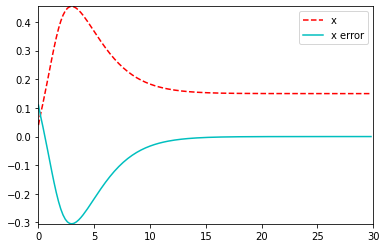

In [4]:
import matplotlib.pyplot as plt
from unit_test import UnitTestPID
#plt.axis([0, 30, 0, 1])


Kp_x=1.0
Ki_x=0.00001
Kd_x=4
    
unit_test = UnitTestPID(PIDController, 0.2)
unit_test.test()


### Build the Activity

In [ ]:
! cd .. && dts exercises build

### Run the activity on the Duckiebot

This activity requires an interaction part, so you need to open three terminals.

In the following steps is shown what has to be run in the two different terminals.


#### Terminal 1

In the first terminal you have to run the exercises with the standard `dts exercises` command:

In [ ]:
! cd .. && dts exercises test --duckiebot_name ![DB_NAME] 

#### Terminal 2

In this terminal you have to open the `keyboard_control` in order to drive you Duckiebot.


In [ ]:
! dts keyboard_control ![DB_NAME]

#### Terminal 3

In the third terminal you have to attach the container where the  activity is running. 

In [ ]:
! docker -H ![DB_NAME].local exec -it agent /bin/bash

Now you are attached to the Docker container that is running on the robot. From this terminal launch the python script that allows you to proceed witht the calibration as shown below. You will be asked to place your Duckiebot on a lane and move it along a straight line using the `keyboard_control`.

In [ ]:
python3 /code/exercise_ws/src/interaction_pkg/src/interaction_node.py